# Group Project
###  Lina Molla, Joycelyn Ng


## Group Contributions Statement
“All three of us wrote the data acquisition and preparation. Lina and Joyelyn cleaned most of the data. Lina created the summary tables and also the scatter plots in the EDA. Joycelyn created the boxplot visualizations in the EDA and conducted the Near Neighbor Classifiers Model. Sam created the histogram visualizations in the EDA which was then edited by Lina and Joycelyn. Joycelyn created the decision regions function and then implemented them into each of the models. Lina did the confusion matrices for each of the models. Lina and Joycelyn performed cross validations for each of the models. Sam helped with the Logistical Regression Model, but it was then completed by Lina and Joycelyn.

Lina wrote the explanation of the visualizations, summary tables, feature selection, and cleaning/splitting of the data. Joycelyn wrote the explanation of the Decision Region Plot function and the SVM and Near Neighbor models, and Sam and Joycelyn wrote the explanation of the LR model and the discussion conclusion at the end. Joycelyn and Lina revised all of the descriptions and explainations and checked the whole file and made revisions to the code.”

## Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
penguins = pd.read_csv('palmer_penguins.csv')

In [3]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
def clean_penguins(data_df):
    '''
    Params: 
      data_df: the data set
    Returns:
      tthe cleaned data
    '''
    df = data_df.copy()

    # shorten Species name
    df["Species"] = df["Species"].str.split().str.get(0)
    # get rid of random incorrect variable type in Sex
    df = df[df['Sex'] != '.']
    
    # drop unnecessary columns
    df = df.drop(['Sample Number', 
                  'Delta 15 N (o/oo)', 
                  'Delta 13 C (o/oo)', 
                  'Individual ID', 
                  'Comments', 
                  'Date Egg',
                  'studyName', 
                  'Stage',
                  'Clutch Completion',
                  'Region'], axis = 1)
    
    # get rid of NaN values
    df = df.dropna()

    return df

First, we did an initial clean of the data in order to remove any unnecessary columns that we will not be examining. After dropping unnecessary columns, we were able to use dropna() to get rid of any NaN values. It is important to use dropna() after we have already examined the columns, determined which ones we will not be using, and determined where the NaN values are mostly coming from. If we use dropna() first, then one of the unnecessary columns may have had a lot of NaN values and caused a large amount of the observations to be dropped when in fact they do not have NaN values for the columns we want to examine. 

We chose to drop Delta 15 N and Delta 13 C from the beginning despite the fact that they are quantitative variables. This is due to the fact that they require further understanding that we do not want to examine when there are other more beneficial quantitative variables already available to use in this data set.

In [6]:
penguins_clean = clean_penguins(penguins)
penguins_clean

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Now, the penguins data set has been cleaned to an extent to be used for splitting and EDA.

In [7]:
penguins_clean.shape

(333, 7)

In [8]:
penguins.Sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [9]:
penguins.Region.unique()

array(['Anvers'], dtype=object)

As we can see here, Anvers is the only region that all of the penguin species are in within this data set, so we drop the Region column.

There are 7 columns and 333 rows within this dataset now that we have done the initial cleaning.

## Split into Test and Training Data

In [10]:
np.random.seed(1234)
train, test = train_test_split(penguins_clean, test_size = 0.2) # hold out 20% of the data
train.shape, test.shape

((266, 7), (67, 7))

Next, we need to split the data into a train and a test set so that we can create models on the training set in order to see how closely it will resemble the "accuracy" of the test set and/or the true population. In order to do this we want to hold out on 20% of the data so the test set is smaller than the training set. You want the training set to be larger to ensure a more accurate calculation of the performance of the model and then perform the test multiple time.

## Exploratory Data Analysis

In this section we performed data analysis through multiple charts and graphs including summary tables, histograms, scatter plots, and box plots. Through looking at these different visualizations we are able to determine which three variables that we should use for our modeling.

In [11]:
train.head(20)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,MALE
138,Adelie,Dream,37.0,16.5,185.0,3400.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
278,Gentoo,Biscoe,43.2,14.5,208.0,4450.0,FEMALE
184,Chinstrap,Dream,42.5,16.7,187.0,3350.0,FEMALE


In [12]:
def summary_table(df, group_cols, value_cols):
    return df.groupby(group_cols)[value_cols].mean().round(2)

We decided to pick specific qualitative variables such as Sex and Island and compare them against quantitative variables such as Culmen length, Culmen Depth, Flipper Length, and Body Mass in these sumary tables. We ultimately want to see which one qualitative variable and two quantitative variables are the best predictors of species.

In [13]:
summary_table(train, ["Species", "Sex"], ["Culmen Length (mm)", 
                                          "Culmen Depth (mm)", 
                                          "Flipper Length (mm)", 
                                          "Body Mass (g)"])

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex                                                                  
Adelie    FEMALE               37.06              17.69               187.80   
          MALE                 40.48              19.06               192.10   
Chinstrap FEMALE               46.70              17.58               191.54   
          MALE                 51.33              19.24               200.11   
Gentoo    FEMALE               45.66              14.26               212.98   
          MALE                 49.73              15.76               221.86   

                  Body Mass (g)  
Species   Sex                    
Adelie    FEMALE        3388.89  
          MALE          4028.02  
Chinstrap FEMALE        3501.92  
          MALE          3965.18  
Gentoo    FEMALE        4697.45  
          MALE          5492.65

In [14]:
summary_table(train, ["Species", "Island"], ["Culmen Length (mm)", 
                                             "Culmen Depth (mm)", 
                                             "Flipper Length (mm)", 
                                             "Body Mass (g)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island                                             
Adelie    Biscoe                  38.97              18.39   
          Dream                   38.60              18.26   
          Torgersen               38.97              18.58   
Chinstrap Dream                   49.10              18.44   
Gentoo    Biscoe                  47.74              15.03   

                     Flipper Length (mm)  Body Mass (g)  
Species   Island                                         
Adelie    Biscoe                  188.40        3703.57  
          Dream                   189.88        3682.14  
          Torgersen               191.83        3781.43  
Chinstrap Dream                   195.98        3742.13  
Gentoo    Biscoe                  217.51        5103.00

These two summary tables shows that Island is a better qualitative predictor because it narrows down which Species it could be whereas with Sex, there are both sexes for each Species. As we can see, Adelie is on all three islands where as Chinstrap is only on Dream and Gentoo is only on Biscoe. Flipper Length seems to vary in length based on species. The length is the highest for Gentoo and the lowest for Adelie, so it is a good quantitative predictor variable for Species. This is the same for Culmen Length except Chinstrap has the highest length when it comes to the Culmen, not the Flipper Length. These tables show the corelation between different qualitative and quantitative features of each of the different species.

In [15]:
def plot_hist(df, colname, alpha):
    ax.hist(df[colname], alpha = alpha, label = df["Species"])
    ax.set(xlabel = colname, ylabel = "Density")
    ax.legend()

We decided to use histograms to compare the quantitative variables of each species.

""


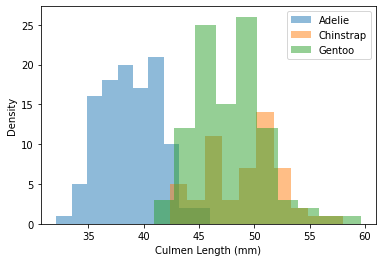

In [16]:
fig,ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, "Culmen Length (mm)", 0.5)

As we see here there is a somewhat higher density of Adelie Penguins, and they have lower Culmen Lengths compared to the lengths of the other two species. Both Chinstrap and Gentoo have longer Culmen Lengths, but Chinstrap has a lower density.

""


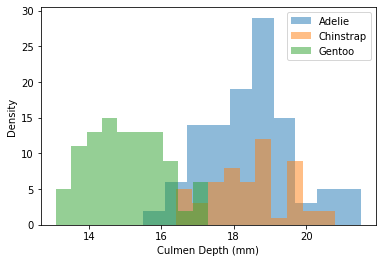

In [17]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Culmen Depth (mm)', 0.5)

However as we can see here, when it comes to Culmen Depth, Adelie and Chinstrap have larger Culmen Depths whereas Gentoo has lower Culmen Depths on average.

""


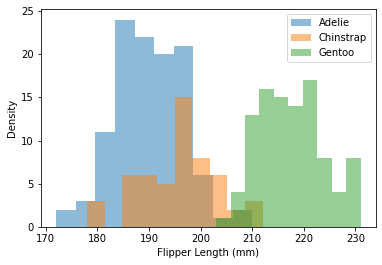

In [18]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Flipper Length (mm)', 0.5)

There is a larger spread of the data when looking at Flipper Length with Adelie having the shortest flippers, Gentoo having the longest, and Chinstrap being somewhere in the middle at least to some extent.

Flipper Length has different ranges of lengths depending on the species, so this is a good quantitative variable to look at.

""


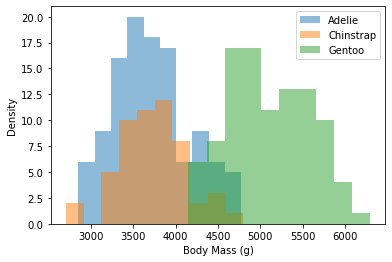

In [19]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Body Mass (g)', 0.5)

These histograms show that there is the largest difference of Body Mass with Gentoo penguins compared to that of Adelie or Chinstrap penguins, but Adelie and Chinstrap do not differ in terms of mass by that much.

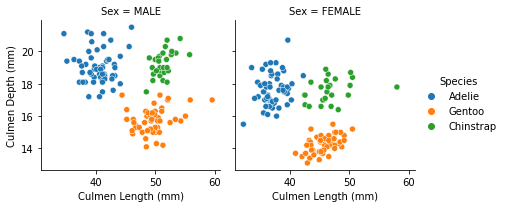

In [20]:
fgrid = sns.relplot(x = "Culmen Length (mm)", 
                    y = "Culmen Depth (mm)", 
                    hue = "Species",
                    col = "Sex",
                    height = 3,
                    aspect = 1, 
                    data = train)

These scatter plots show the difference between the Culmen Length and the Culmen Depth based on Sex. As we can see, there does not seem to be much of a difference between the different sexes. Therefore, this variable could potentially be eliminated which is why we will explore island next.

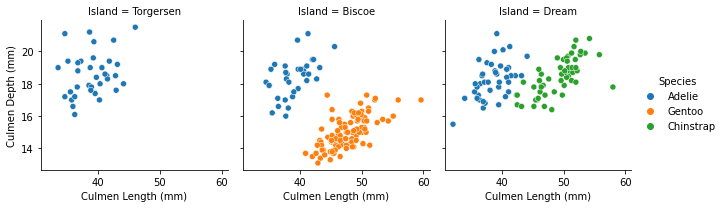

In [21]:
fgrid = sns.relplot(x = "Culmen Length (mm)", 
                    y = "Culmen Depth (mm)", 
                    hue = "Species",
                    col = "Island",
                    height = 3,
                    aspect = 1, 
                    data = train)

|We see that there is the biggest difference between the different islands because only the Adelie species is on Torgersen. However, in Biscoe, there are the Gentoo species and the Adelie species, and on Dream, there are the Chinstrap species and the Adelie species. 

Therefore, regardless of the quantitative variable, the qualitative variable of Island shows the biggest difference, so Island is a good qulitative variable to try to predict species.

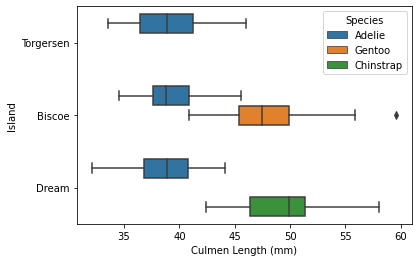

In [22]:
fgrid = sns.boxplot(x = "Culmen Length (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)

As shown above in the box plot this yields the same result as the scatter plot based on the variable Island. This further confirms that we should use the qualititive variable Island as our qualitative variable. Additionally, this boxplot reveals that it will be useful to use Island and Culmen Length because when we examine the different Islands, we narrow down the species to either Adelie if the Island is Torgersen, Adelie or Gentoo if on Biscoe, and Adelie or Chinstrap if on Dream. By comparing the Culmen length of the species Gentoo and Chinstrap we are able to slightly determine our target species. However in order to better analyze this we need another quantitative variable.

Culmen Length seems like a good quantitative variable to predict species.

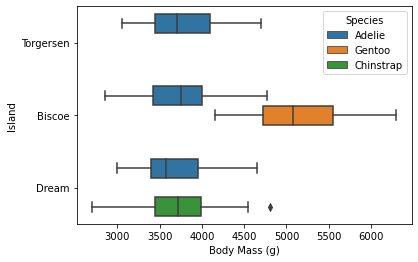

In [23]:
fgrid = sns.boxplot(x = "Body Mass (g)", 
                    y = "Island",
                    hue = "Species",
                    data = train)

In this box plot there is a big diference between Gentoo and Chinstrap so we could have used it as our second quantiative variable, but we will examine another quantitative variable to see if it yields better results. In this we see that Dream and Adelie are the closest in terms of Body Mass whereas the Body Mass of Gentoo is significantly higher. 

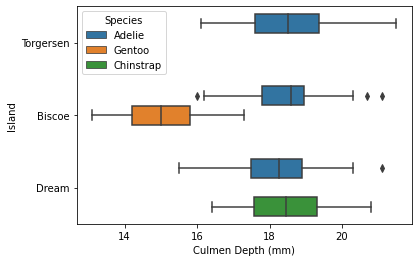

In [24]:
fgrid = sns.boxplot(x = "Culmen Depth (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)

The culmen depth of the Chinstrap species most closely resembles the Adelie species. Gentoo is farther to the left in this boxplot because it has a lower culmen depth so this is another potential variable that we can use, but let's explore even more.

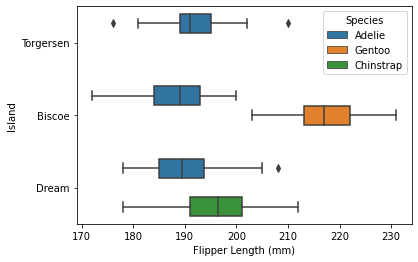

In [25]:
fgrid = sns.boxplot(x = "Flipper Length (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)

In this boxplot, we see that there is a large distincftion between Gentoo and the other two species. However the key difference with Flipper Length is that there is a slightly larger distinction between Adelie and Chinstrap compared to the other quantitative variables where we observed that two species moreso overlapped in size of the quantitative variables. 

This is why we will choose Flipper Length as a good quantitiative variable because it does show more differentiation between the species in their lengths than the other variables besides Culmen Length which is the other variable that we will use.

# Feature Selection
Based on the EDA, we decided to select the predictor variables Island as the qualitative variable and Culmen length and Flipper Length as the quantitative variables. This is because in order to predict the target variable Species we have to choose the most differentiable variables for our predictions. Island was very telling in the way that only certain species existed on each unique Island. This will lead us to more easily narrow down the species just off of what Island the species belongs to. Culmen Length differed a lot based on the species, so it is a great variable to look at in order to predict species. The second most telling quantitative variable was in fact Flipper Length, so we decided to use that as our third predictor variable.

## Data Cleaning, Split into X (predictor data -> 1 qualitative and 2 quantitative variables) and y (target data)
We dropped all of the columns except for the 3 chosen predictor variables and the 1 target variable aka species. We then split the variable and did some additional cleaning to make data observations easier. The X variable holds the predictive variables (Culmen Length, Flipper Length, and Island) and the Y variable holds the target variable we want to predict: Species.

In [26]:
def prep_penguins(data_df):
    '''
    Params: 
      data_df: the data set penguins
    Returns:
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species (as 0, 1, or 2)
    '''
    df = data_df.copy()
    
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Species'] = le.fit_transform(df['Species'])

    # drop unnecessary columns
    # only keep 1 qualitative and 2 quantitative variables
    df = df.drop(['Culmen Depth (mm)', 
                  'Body Mass (g)',
                  'Sex'], axis = 1)

    # split into X and y
    X = df.drop(['Species'], axis = 1)
    y = df['Species']


    return(X, y)

During the data prep we needed to transform the qualitative variables into quantitative variables. This is why we turned the Sex, Island, and Species into 0s, 1s, and 2s so we can work with them. This is necessary because we found that our models did not work if we kept them as qualitative variables because these models cannot work with the qualitative category names, so we replaced the names with number representations.

During this section in order to further clean we also dropped the columns Sex, Body Mass, and Culmen Depth because they are irrelevant to our model. We also dropped species from our X because we want the X to just be the predictor variables. We made our y the species, target variable.

In [27]:
X_train, y_train = prep_penguins(train)
X_test, y_test = prep_penguins(test)

Now we have separate training and testing sets split between the predictor variables and the target variable.

In [28]:
X_train

,Island,Culmen Length (mm),Flipper Length (mm)
7,2,39.2,195.0
264,0,50.5,222.0
138,1,37.0,185.0
28,0,37.9,172.0
152,1,46.5,192.0
...,...,...,...
210,1,50.2,202.0
59,0,37.6,194.0
302,0,47.4,212.0
217,1,49.6,193.0


As you can see above X_train only contains the predictor variables. Island 1 is Dream, 2 is Biscoe, and 3 is Torgersen.

In [29]:
y_train

7      0
264    2
138    0
28     0
152    1
      ..
210    1
59     0
302    2
217    1
311    2
Name: Species, Length: 266, dtype: int64

And here you can see y_train only contains the Species represented by numbers. 0 represents Adelie, 1 represents Chinstrap, and 2 represents Gentoo.

## Modeling

## Decision Region Plot

In [30]:
# These are data used to plot dicision regions on different islands
dream_penguins = test.loc[test["Island"] == "Dream"]
dream_X, dream_y = prep_penguins(dream_penguins)

torgersen_penguins = test.loc[test["Island"] == "Torgersen"]
torgersen_X, torgersen_y = prep_penguins(torgersen_penguins)

biscoe_penguins = test.loc[test["Island"] == "Biscoe"]
biscoe_X, biscoe_y = prep_penguins(biscoe_penguins)

We did this to split up the plotting regions into three different islands. We split into the island Torgersen as well just as a formality but because Torgesen only had the Adelie Species in it we ran into a problem. The model did not like that because there was only one unique class label for the y set which is why it will not execute. Thus, you will see one Decision Region Plot for each model with three species in it while the other two Islands had two species on the island, so the models were able to create the plots.

We split the data up by Island and then used the same prep cleaning function on the 3 splits of the data corresponding to island. 

In [31]:
def plot_decision_function(model, df, X, y):
    '''
    Params: 
      model: the model we are using
      df: the data
      X: the quantitative variables for the data
      y: species
    Returns:
      decision region plots
    '''

    quant = ['Culmen Length (mm)', 'Flipper Length (mm)']
    model.fit(X[quant], y)
    
    range_items = {
    feature_name: (X[feature_name].min() - 1, X[feature_name].max() + 1)
    for feature_name in quant
    }
    feature_names = list(range_items.keys())

    xx, yy = np.meshgrid(
        np.arange(range_items[feature_names[0]][0], range_items[feature_names[0]][1], 0.02),
        np.arange(range_items[feature_names[1]][0], range_items[feature_names[1]][1], 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax = sns.scatterplot(data=df, x="Culmen Length (mm)", y= "Flipper Length (mm)", hue="Species")
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="YlGnBu")

    return ax

In [32]:
np.unique(y_train)

array([0, 1, 2])

In this function we first had to fit the model based on the quantitative and the qualititave data. We combined both of the quantitative data from the variables into the variable quant so is is easier to work with. After that we created a dictionary that contains the column names along with the miniumum and maximum values. Then we created the mesh grid and then computed the predictions. After we plotted the data.

## Model 1: Support Vector Machine

We want to minimize overfitting which is why we want to determine the optimal complexity for the model. We wanted to find the best parameter for the C value which determines the margin of the hyperplane.

In [33]:
def best_Cparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_C: The best index of the best cross validation score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1,15):
        model = SVC(kernel = "poly", C = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_C = d
            best_score = cv_score

    ax.set(title = "Best C : " + str(best_C), xlabel = "C", ylabel = "CV Score")
    return best_C, best_score

This function attempts to find the best C parameter. It initializes the best score to 0. After that it loops through 14 times the cross validation score and then finds the mean and then plots it. In order to find the best CV score each time that we go through the loop we compare it to the current based CV score to determine which one is higher. In the end it returns the best C index and also the score associated with it. 

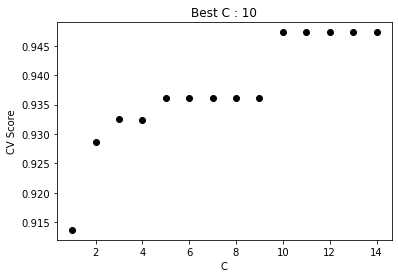

In [34]:
best_C, best_score = best_Cparam(X_train, y_train)

The best score is the 10th iteration. Once we find what the best C value is we will then train a model that is updated and then try to calculate the difference in scores between the training and the test data sets.

In [35]:
svm = SVC(kernel='poly', C=best_C)
svm.fit(X_train, y_train)
svm.score(X_train, y_train), svm.score(X_test, y_test)

(0.9511278195488722, 0.9552238805970149)

As we can see there is a very small difference in score between the Test and the Training set. This means that there was little over or underfitting as observed. However we also want to look at the unseen data with a confusion matrix. 

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


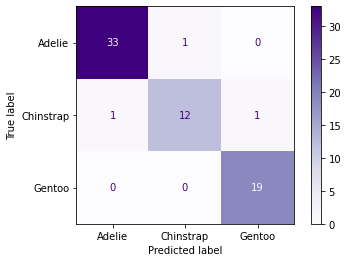

In [36]:
plot_confusion_matrix(svm, X_test, y_test, display_labels= ['Adelie','Chinstrap','Gentoo'], cmap = plt.cm.Purples);

As seen our model is fairly accurate with only 1 of each species being displaced. By using this to validate the performance of the model we see that it performed well.

The visualization shows how accurate the model was, showing how often our predicted label matched the true label for the penguin species. For the Gentoo 19 of the 19 were corretly labeled by the model. For the Chinstrap 12 of the 14 labeled were correctly labeled and 33 of 34 of the Adelie species were labeled correctly. This means that of the 67 possible, 64 were labeled their true species. The model was a little over 95% accurate in predicting the species of penguin. |

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

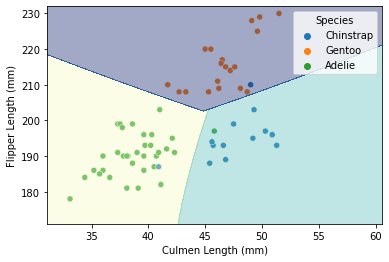

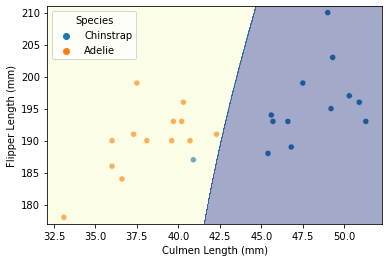

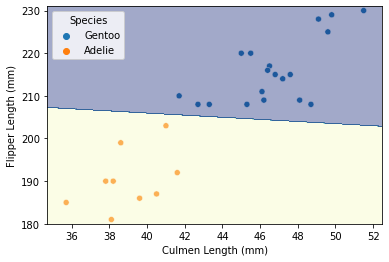

In [37]:
plot_decision_function(svm, test, X_train, y_train)
plot_decision_function(svm, dream_penguins, dream_X, dream_y)
plot_decision_function(svm, biscoe_penguins, biscoe_X, biscoe_y)

Through these decision region graphs we can clearly see that only certain species are on certain islands. For example, Adelie and Chinstrap are the only two species in Dream. Gentoo and Adelie are the only two species on Biscoe. We also decided to plot the the whole test set because there was an error with the fact that we did not have two unique y values when looking at the Torgesen island because only Adelie is on Torgeson which is why we tried to show the split based off of the test set.

## Model 2: Logistical Regression

In [38]:
LR = LogisticRegression(max_iter = 40000)

cv_score = cross_val_score(LR, X_train, y_train, cv=10).mean()
cv_score

0.9663817663817664

With the logistic regression model we saw an accuracy cross validation core of over 96% based on the means of 10 trials. 

In [39]:
def best_LRCparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_C: The best index of the best cross validation score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1, 15):
        model = LogisticRegression(max_iter = 40000, C = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_C = d
            best_score = cv_score

    ax.set(title = "Best C: " + str(best_C), xlabel = "C", ylabel = "CV Score")
    return best_C, best_score

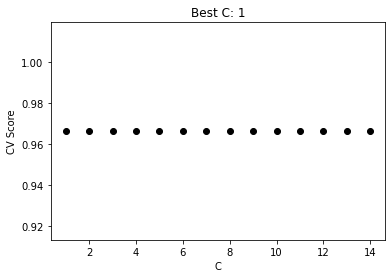

In [40]:
best_C, best_score = best_LRCparam(X_train, y_train)

In orer to not recieve errors we did multiple iterations to find the best cross validation score from the model. We needed to do above 200 which is why we chose 40000. The first iteration is the most accurate for the model at over 96%. This means our model generalizes to the whole of the data set fairly well, over 96% accuracy to be more exact. 

In [41]:
LR = LogisticRegression(C = best_C, max_iter = 40000)
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9661654135338346, 0.9701492537313433)

Comparing the train and test scores side by side we see that there is a very small difference between the scores which is essential to not over or underfit the data. 

In [42]:
y_test_pred = LR.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[33,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 19]])

Again we plotted the confusion matrix in order to observe data that is hidden. Here we see that again only 1 or less of each species was misplaced.

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


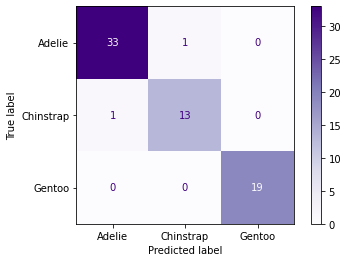

In [43]:
plot_confusion_matrix(LR, X_test, y_test, display_labels= ['Adelie','Chinstrap','Gentoo'], cmap = plt.cm.Purples)

The matrix displays how well the model predicted penguin species compared to the true species label. For the Gentoo, 19 of the 19 were labeled correctly with no errors. For the Chinstrap, 13 of the 14 were labeled accurately with one being labeled incorrectly. As for the Adelie, 33 of the 34 were correctly labeled and one was mislabeled. Overall 65 of the 67 predictions were correct, an accuracy of about 97% indicating that this model was fairly accurate. Compared to the SVM model it is a slight bit more accurate in predicting the species. 

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

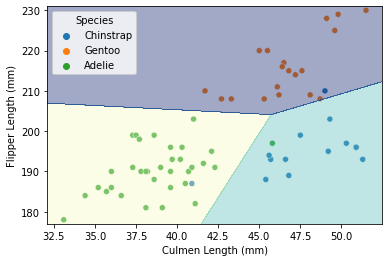

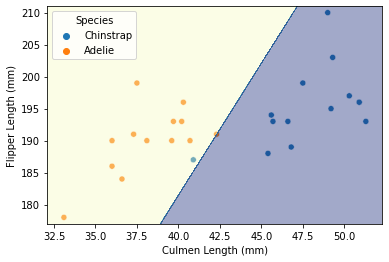

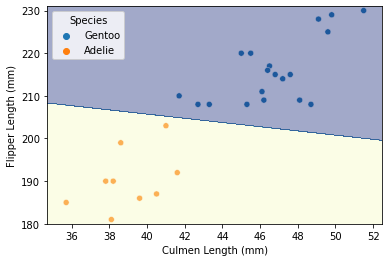

In [44]:
plot_decision_function(LR, test, X_test, y_test)
plot_decision_function(LR, dream_penguins, dream_X, dream_y)
plot_decision_function(LR, biscoe_penguins, biscoe_X, biscoe_y)

These decision regions closely model the same as the decision regions for the SVM model which means that both methods are good for predicting the target variable. This also means that we had greater precision in predicting the Species.

## Model 3: Near Neighbor Classifers

In [45]:
def best_Depthparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_depth: The best index of the best depth score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1,30):
        model = KNeighborsClassifier(n_neighbors = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_depth = d
            best_score = cv_score

    ax.set(title = "Best Depth : " + str(best_depth), xlabel = "Depth", ylabel = "CV Score")
    return best_depth, best_score

In terms of the Depth parameter for the logistic model we performed multiple iterations and compared 10 cross validaitions in each loop to determine the mean then plotted it. Again similar to before we initialized the best score as 0 and then compared the cv score to the current best score to see which one is better.

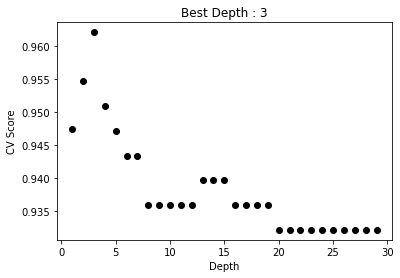

In [46]:
best_depth, best_score = best_Depthparam(X_train, y_train)

As we can see in this one the best Depth is 3. However in this plot the CV scores seem to vary more. Therefore we have to look at the test and the training set to see the difference.

In [47]:
KNC = KNeighborsClassifier(n_neighbors = best_depth)
KNC.fit(X_train, y_train)
KNC.score(X_train, y_train), KNC.score(X_test, y_test)

(0.9699248120300752, 0.9552238805970149)

The train and test scores are fairly close to one another but not as close as the two previous models. The other two models had scores within one percent of one another, even lower than that. While this model has scores that are over 1% almost near 2% from one another. The train score being almost 97% and the test score being about 95.5%. The numbers are still close to one another so we do not believe overfitting is an issue.

In [48]:
y_test_pred = KNC.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[33,  1,  0],
       [ 1, 12,  1],
       [ 0,  0, 19]])

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


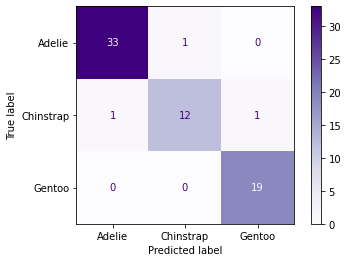

In [49]:
plot_confusion_matrix(KNC, X_test, y_test, display_labels= ['Adelie','Chinstrap','Gentoo'], cmap = plt.cm.Purples);

This model, like the other two, correctly predicted all 19 species of Gentoo with no mistakes. For Chinstrap it correctly labeled 12 of the 14 and for Adelie it correctly labeled 33 of the 34. This is nearly identical to the SVM model which had the same level of accuracy, predicting 64 of the 67 true labels correctly and missing on 3 of them. Overall the model is pretty accurate, but the logistic regression model was slightly more accurate than both the other two models. 

/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/joycelynng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

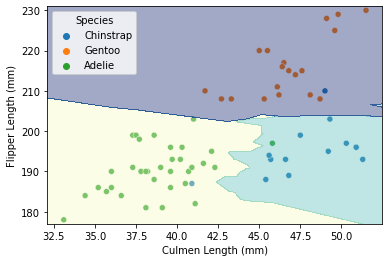

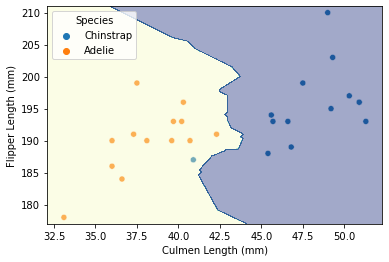

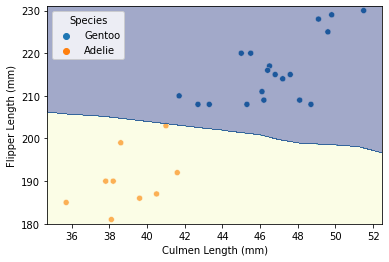

In [50]:
plot_decision_function(KNC, test, X_test, y_test)
plot_decision_function(KNC, dream_penguins, dream_X, dream_y)
plot_decision_function(KNC, biscoe_penguins, biscoe_X, biscoe_y)

As we can see in these decision regions it is a lot more jagged than the last two models. However very few were misplaced so we believe that after these three models the variables that we chose were the best ones.

# Discussion

  We recommend choosing Island, Flipper Length, and Culmen Length as predictor variables of penguin species as we believe that this yields the highest accuracy.
  
  The models themselves were, for the most part, greatly accurate in identifying the species of penguin based on Island, Flipper length, and Culmen Length. The logistic regression model was the most accurate as it only misidentified two of the species out of a total of 67. The SVM model and Near Neighbor Classifier were also very accurate but both misidentified one more of the species than the logistic regression model. The logistic regression model identified 65 correctly while the other two identified 64 correctly. All models weres able to correctly identify all of the Gentoo species based on the variables used. The logistic regression model was close to identifying all of the Chinstrap species but misidentified one, whereas the other two models misidenitified 2 Chinstrap species. All of the models performed the same when identifying the Adelie species, identifying 33 out of 34. There seems to be no problem at all distinguishing the Gentoo based on the varaibles given but there are some mistakes, albeit very few, when identifying the Chinstrap and Adelie species. This appears to be where the models fall short slightly. While they are all very accurate this is an area where improvement could be made. Looking at these individual cases would give us a better understanding of where the models fail and make these incorrect labels. 
  
  When looking at one of Chinstrap data points that was incorrectly labeled Adelie, it is an outlier from the rest of the data points. The penguin's culmen length is slightly under 41 mm while the rest have an average culmen length of about 47.5 mm. This specific penguin had a culmen much shorter than the typical Chinstrap. This shows how outliers can affect the set but luckily for ours it did not affect our prediciton models that much. 

Training with more data points may also help us avoid overfitting. The data set is relatively small compared to the true population of penguins. The most important part is to mitigate as much bias as possible when collecting the data. Since this is such a small data set it would likely fail in the real world especially with the numerous species of penguins that exist if we were to add more species and islands. 
